# Data Visualization Notebook

This notebook contains visualizations for:
1. Global Temperature Anomalies (1880-2024)
2. Earthquake Magnitudes (Last 24 Hours)

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta, timezone

## 1. Temperature Anomalies Visualization

In [21]:
# Import functions from temperature_plot.py
from temperature_plot import load_temperature_df, plot_temperature_anomalies

In [22]:
# Load temperature data
filepath = os.path.join("..", "data", "temperatures.csv")
temp_df = load_temperature_df(filepath)

# Display the first few rows to understand the data structure
print("Temperature Dataset Structure:")
temp_df.head()

Temperature Dataset Structure:


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Annual_Mean
0,1880-01-01,-0.20,-.25,-.09,-.16,-.09,-.21,-.20,-.10,-.15,-.23,-.23,-.18,-.17,***,***,-.11,-.17,-.20,-0.17
1,1881-01-01,-0.20,-.15,.02,.04,.07,-.19,.01,-.04,-.16,-.22,-.19,-.07,-.09,-.10,-.18,.04,-.07,-.19,-0.09
2,1882-01-01,0.16,.14,.05,-.16,-.14,-.22,-.16,-.08,-.15,-.23,-.17,-.36,-.11,-.09,.08,-.08,-.15,-.18,-0.11
3,1883-01-01,-0.29,-.36,-.12,-.18,-.17,-.07,-.07,-.14,-.22,-.11,-.24,-.11,-.17,-.19,-.34,-.16,-.09,-.19,-0.17
4,1884-01-01,-0.13,-.08,-.36,-.40,-.33,-.34,-.30,-.27,-.27,-.25,-.33,-.31,-.28,-.26,-.10,-.36,-.31,-.28,-0.28


In [23]:
# Display basic statistics of the temperature data
temp_df.describe()

,Year,Jan,Annual_Mean
count,146,146.000000,145.000000
mean,1952-07-02 03:27:07.397260288,0.078836,0.075310
min,1880-01-01 00:00:00,-0.810000,-0.490000
25%,1916-04-01 12:00:00,-0.240000,-0.200000
50%,1952-07-02 00:00:00,-0.010000,-0.030000
75%,1988-10-01 12:00:00,0.317500,0.310000
max,2025-01-01 00:00:00,1.360000,1.280000
std,NaN,0.443782,0.389474


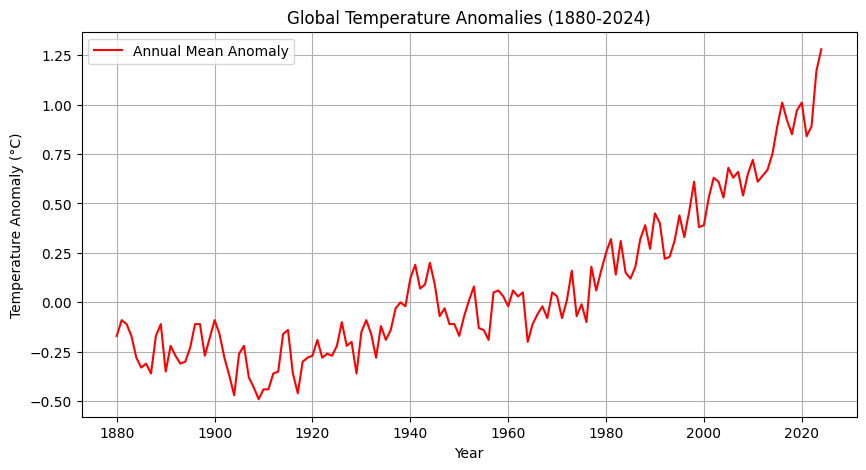

In [24]:
# Create and display the temperature anomalies plot
temp_plot = plot_temperature_anomalies(temp_df)
plt.show()

## 2. Earthquake Magnitudes Visualization

In [25]:
# Import functions from earthquake_plot.py
from earthquake_plot import fetch_earthquake_json, construct_earthquake_df, plot_earthquake_magnitudes

In [26]:
# Fetch earthquake data from USGS API
end_time = datetime.now(timezone.utc)
start_time = end_time - timedelta(days=1)
print(f"Fetching earthquake data from {start_time.isoformat()} to {end_time.isoformat()}")
data_json = fetch_earthquake_json(start_time, end_time)

# print the beginning of the json data
print("Earthquake Data Structure:")
data_json.keys()
data_json["features"][0]


Fetching earthquake data from 2025-03-07T05:42:48.044834+00:00 to 2025-03-08T05:42:48.044834+00:00
Earthquake Data Structure:


{'type': 'Feature',
 'properties': {'mag': 2.1,
  'place': '49 km WNW of Nanwalek, Alaska',
  'time': 1741411438361,
  'updated': 1741411568067,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak02532w4h30',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ak02532w4h30&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'automatic',
  'tsunami': 0,
  'sig': 68,
  'net': 'ak',
  'code': '02532w4h30',
  'ids': ',ak02532w4h30,',
  'sources': ',ak,',
  'types': ',origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': 0.35,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.1 - 49 km WNW of Nanwalek, Alaska'},
 'geometry': {'type': 'Point', 'coordinates': [-152.7384, 59.5044, 80.2]},
 'id': 'ak02532w4h30'}

In [27]:
# Process the earthquake data into a DataFrame
eq_df = construct_earthquake_df(data_json)

# Display the first few rows to understand the data structure
print("Earthquake Dataset Structure:")
eq_df.head()

Earthquake Dataset Structure:


,timestamp,magnitude
295,2025-03-07 05:49:57.490,-0.74
294,2025-03-07 05:56:21.530,1.33
293,2025-03-07 06:05:24.110,-0.79
292,2025-03-07 06:10:15.770,1.40
291,2025-03-07 06:11:18.690,0.75


In [28]:
# Display basic statistics about the earthquake magnitudes
print(f"Total earthquakes recorded: {len(eq_df)}")
print("\nMagnitude statistics:")
eq_df["magnitude"].describe()

Total earthquakes recorded: 296

Magnitude statistics:


count    296.000000
mean       1.210236
std        1.145456
min       -0.970000
25%        0.420000
50%        1.080000
75%        1.600000
max        5.400000
Name: magnitude, dtype: float64

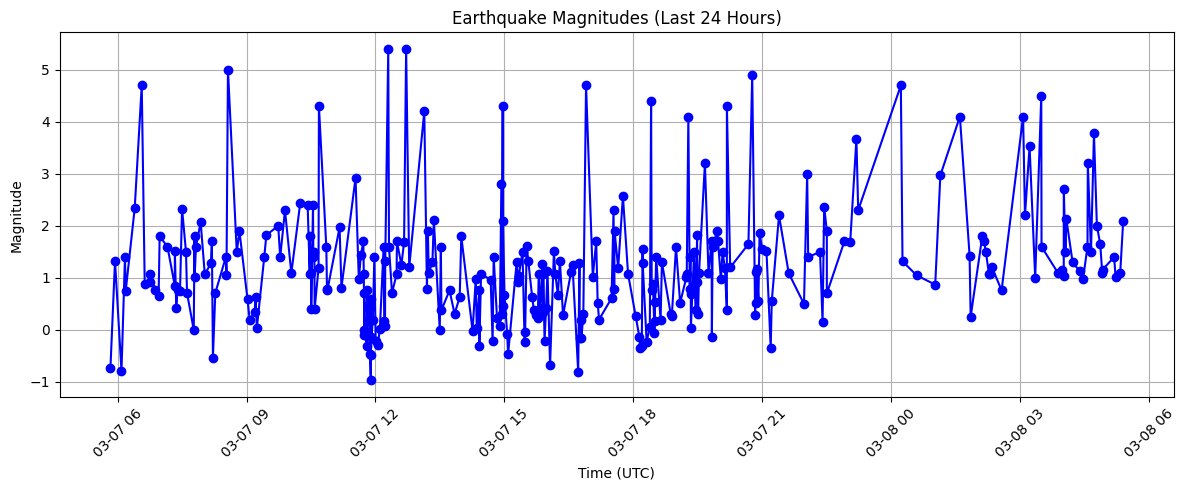

In [29]:
# Create and display the earthquake magnitudes plot
eq_plot = plot_earthquake_magnitudes(eq_df)
plt.show()

## Save Both Plots to Files

Temperature plot saved to 'plots/temperature_anomalies.png'
Earthquake plot saved to 'plots/earthquake_magnitudes.png'


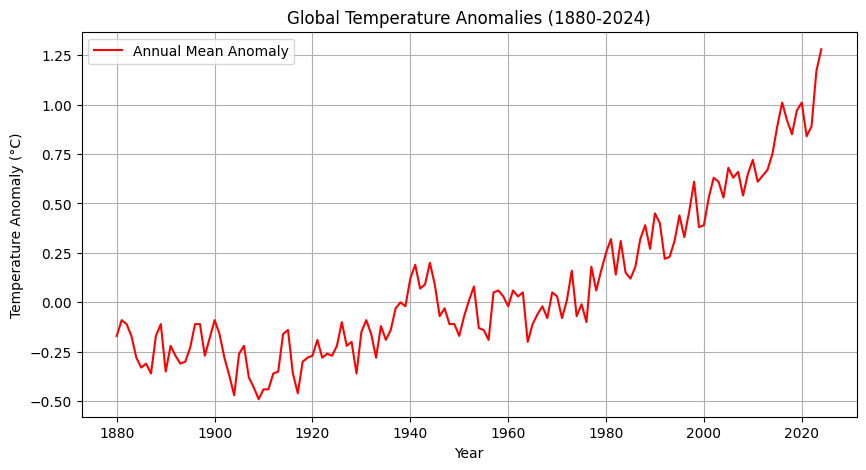

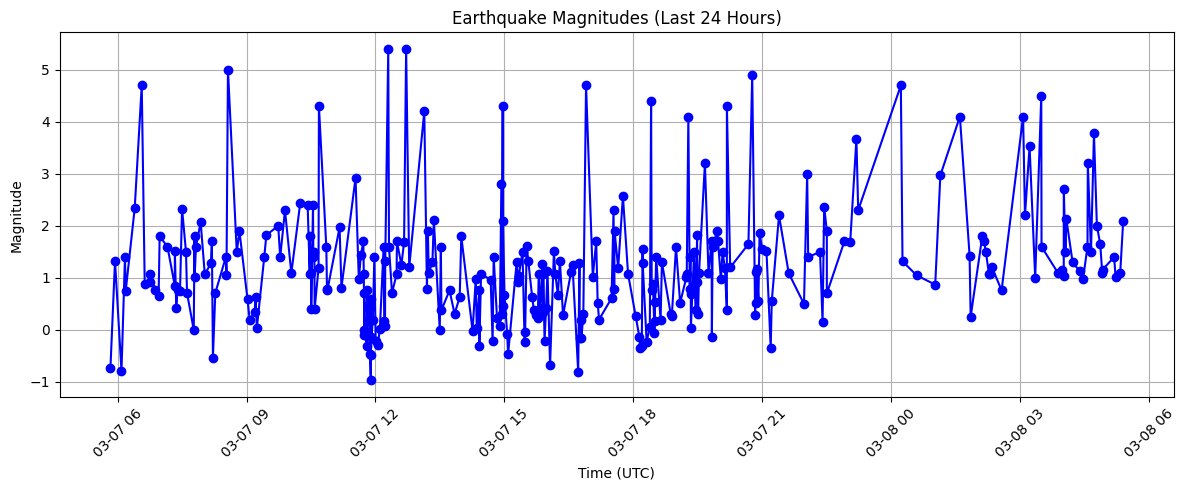

In [30]:
# Ensure plots directory exists
os.makedirs("plots", exist_ok=True)

# Save temperature plot
temp_plot = plot_temperature_anomalies(temp_df)
temp_output_path = os.path.join("plots", "temperature_anomalies.png")
temp_plot.savefig(temp_output_path)
print(f"Temperature plot saved to '{temp_output_path}'")

# Save earthquake plot
eq_plot = plot_earthquake_magnitudes(eq_df)
eq_output_path = os.path.join("plots", "earthquake_magnitudes.png")
eq_plot.savefig(eq_output_path)
print(f"Earthquake plot saved to '{eq_output_path}'")